<img src="files/4171571040_bab4a40acf_z.jpg" width="600" height="300">

# AUTOR: MARIO ARTECHE MIRANDA

# TABLA DE CONTENIDOS
* [1. SECCIÓN NÚMERO 1](#SECCIÓN-NÚMERO-1)   
* [2. SECCIÓN NÚMERO 2](#SECCIÓN-NÚMERO-2)   
* [3. SECCIÓN NÚMERO 3](#SECCIÓN-NÚMERO-3)   
* [4. SECCIÓN NÚMERO 4](#SECCIÓN-NÚMERO-4)   
* [5. SECCIÓN NÚMERO 5](#SECCIÓN-NÚMERO-5)   
* [6. SECCIÓN NÚMERO 6](#SECCIÓN-NÚMERO-6)   
* [7. SECCIÓN NÚMERO 7](#SECCIÓN-NÚMERO-7)   
* [8. SECCIÓN NÚMERO 8](#SECCIÓN-NÚMERO-8)
* [9. SECCIÓN NÚMERO 9](#SECCIÓN-NÚMERO-9)   
* [10. SECCION NÚMERO 10](#SECCIÓN-NÚMERO-10)   

$\color{orange}{\text{CARGAMOS LOS PAQUETES}}$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

$\color{orange}{\text{CARGAMOS LAS BASES DE DATOS HIPERVINCULADAS}}$

Crea un dataframe con los datos del fichero   
1:[Nhospitalizados.csv](./data/T_situacion-de-hospitalizados-por-coronavirus.csv)      
2:[pcr.csv](./data/T_situacion-epidemiologica-coronavirus-provincias.csv)   
3:[Enfermos.csv](./data/T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv)   
4:[provincias.csv](./data/T_Poblacion_municipos_sexo.csv)   
5:[habitprovincia.csv](./data/T_Poblacion_superficie_comunidades.csv)   

$\color{orange}{\text{TRATAMIENTO DE LOS DATOS}}$

In [2]:
# número de hospitalizados en planta, hospitalizados en UCI, altas y fallecimientos por hospital debidos al coronavirus
Nhospitalizados = pd.read_csv('./data/T_situacion-de-hospitalizados-por-coronavirus.csv') 

In [3]:
Nhospitalizados.head(3) #vemos la tabla y observamos cantidad de NaN

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion
0,2020-02-26,Todos,Huelva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,XXXX,NaN
1,2020-02-26,Todos,Sevilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,XXXX,NaN
2,2020-02-26,Todos,Almería,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,XXXX,NaN


In [4]:
Nhospitalizados.isnull().sum() #observamos el total de nulos por columna y los sumamos

fecha                              0
hospital                           0
provincia                          0
nuevos_hospitalizados_planta     138
hospitalizados_planta            130
nuevos_hospitalizados_uci        242
hospitalizados_uci               234
porcentaje_ocupacion_uci        4760
nuevas_altas                     210
altas                            200
nuevos_fallecimientos             10
fallecimientos                     0
codigo_ine                         0
posicion                        1904
dtype: int64

In [5]:
Nhospitalizados = Nhospitalizados.fillna(0) #cambiamos los NaN por 0

In [6]:
Nhospitalizados.head(3) #vemos si se ha cambiado correctamente

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion
0,2020-02-26,Todos,Huelva,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0
1,2020-02-26,Todos,Sevilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0
2,2020-02-26,Todos,Almería,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0


In [7]:
#  Datos diarios de confirmados, nuevos casos, altas y fallecimientos por provincias debidos al coronavirus (COVID-19) por provincias. Los datos de confirmados se facilitan por la Red de Vigilancia Epidemiológica a las 20:00 horas del día anterior y corresponden a personas a las que se les ha efectuado la prueba de PCR (prueba de detección molecular).
pcr = pd.read_csv('./data/T_situacion-epidemiologica-coronavirus-provincias.csv',delimiter=";") #cargamos el archivo

In [8]:
pcr.head() #vemos que valores hay en las columnas

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
0,2020-02-26,Sevilla,1,NaN,NaN,0.0,XXXX,NaN
1,2020-02-26,Almería,0,NaN,NaN,0.0,XXXX,NaN
2,2020-02-26,Cádiz,0,NaN,NaN,0.0,XXXX,NaN
3,2020-02-26,Córdoba,0,NaN,NaN,0.0,XXXX,NaN
4,2020-02-26,Málaga,0,NaN,NaN,0.0,XXXX,NaN


In [9]:
pcr.isnull().sum() #suma de valores nulos por columnas, los tratare posteriormente

fecha                   0
provincia               0
casos_confirmados       0
nuevos_positivos        8
altas                 219
fallecimientos         18
codigo_ine              0
Posicion             1904
dtype: int64

In [10]:
#Datos de número de pacientes por provincia, sexo y tramo de edad. El dato de pacientes enfermos incluye todos los diagnósticos compatibles con coronavirus (neumonía por COVID-19 y enfermedad por COVID-19).
Enfermos = pd.read_csv('./data/T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv', delimiter=";")  

In [11]:
Enfermos.head() #vemos que valores hay en las columnas

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
0,2020-10-19,AV,0-9,271,234,505
1,2020-10-19,PA,0-9,247,225,472
2,2020-10-19,SO,0-9,157,151,308
3,2020-10-19,ZA,0-9,296,278,574
4,2020-10-19,BU,10-19,889,779,1668


In [12]:
# Datos del censo de habitantes por provincias de los años 2018 y 2019.
provincias = pd.read_csv('./data/T_Poblacion_municipos_sexo.csv', delimiter= ';',skiprows=3) 

In [13]:
provincias.head() #vemos que valores hay en las columnas

,Provincia,Población total 2019,Población total 2018,Población Hombres 2019,Población Hombres 2018,Población Mujeres 2019,Población Mujeres 2018
0,02 Albacete,388167.0,388786.0,193911.0,194158.0,194256.0,194628.0
1,03 Alicante,1858683.0,1838819.0,920915.0,911097.0,937768.0,927722.0
2,04 Almería,716820.0,709340.0,365701.0,361319.0,351119.0,348021.0
3,01 Álava,331549.0,328868.0,163499.0,162175.0,168050.0,166693.0
4,33 Asturias,1022800.0,1028244.0,488137.0,490738.0,534663.0,537506.0


In [14]:
# Datos de las 50 provincias de España (población según padrón municipal de habitantes del INE a 1 de julio de 2019) y de las ciudades autónomas de Ceuta y Melilla.
habitprovincias = pd.read_csv('./data/T_Poblacion_superficie_comunidades.csv', delimiter= ',',skiprows=2)  

In [15]:
habitprovincias.head() #vemos que valores hay en las columnas

,Unnamed: 0,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma
0,Madrid,8027,M,6663394,COMUNIDAD DE MADRID,C14
1,Barcelona,7733,B,5664579,CATALUÑA,C09
2,Valencia,10807,V,2565124,COMUNIDAD VALENCIANA,C10
3,Sevilla,14036,SE,1942389,ANDALUCÍA,C01
4,Alicante,5817,A,1858683,COMUNIDAD VALENCIANA,C10


In [16]:
# CAMBIAMOS EL NOMBRE A LA PRIMERA COLUMNA
habitprovincias.rename(columns={"Unnamed: 0" : "Provincia"}, inplace= True) # de "Uannamed: 0" a "Provincia" con la funcion rename
habitprovincias.head(3) #vemos que se renombra correctamente

,Provincia,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma
0,Madrid,8027,M,6663394,COMUNIDAD DE MADRID,C14
1,Barcelona,7733,B,5664579,CATALUÑA,C09
2,Valencia,10807,V,2565124,COMUNIDAD VALENCIANA,C10


# SECCIÓN NÚMERO 1

### 1:Mostrar un listado de los hospitales de los cuales se conoce la incidencia del COVID-19. ¿Qué hospital ha sufrido el mayor número de fallecimientos?. ¿En qué provincia se encuentra dicho hospital?

In [17]:
# LISTADO DE HOSPITALES CON LA INCIDENCIA
Nhospitalizados.hospital.unique() #nos dice los valores unicos dentro de la columna hospital

array(['Todos', 'Complejo Asistencial Universitario de León',
       'Complejo Asistencial Universitario de Burgos',
       'Complejo Asistencial de Ávila', 'Complejo Asistencial de Segovia',
       'Complejo Asistencial de Zamora', 'Hospital Santiago Apóstol',
       'Hospital Santos Reyes', 'Hospital El Bierzo',
       'Complejo Asistencial de Soria',
       'Hospital Clínico Universitario de Valladolid',
       'Complejo Asistencial Universitario de Salamanca',
       'Complejo Asistencial Universitario de Palencia',
       'Hospital Universitario Río Hortega',
       'Hospital de Medina del Campo'], dtype=object)

In [18]:
#HOSPITAL CON EL MAYOR NUMERO DE FALLECIMIENTOS
Hospfalle = Nhospitalizados.groupby(["hospital"]).nuevos_fallecimientos.sum() #creamos un objeto que agrupe por hospital y nuevos_fallecimientos
Hospfalle.sort_values(ascending = False) #ordenamos dicho objeto de manera descendente

hospital
Todos                                              2211.0
Complejo Asistencial Universitario de Salamanca     456.0
Complejo Asistencial Universitario de León          436.0
Hospital Clínico Universitario de Valladolid        257.0
Complejo Asistencial de Segovia                     228.0
Hospital Universitario Río Hortega                  227.0
Complejo Asistencial de Ávila                       184.0
Complejo Asistencial Universitario de Burgos        164.0
Complejo Asistencial de Zamora                      151.0
Complejo Asistencial de Soria                       132.0
Complejo Asistencial Universitario de Palencia      116.0
Hospital El Bierzo                                   80.0
Hospital Santos Reyes                                63.0
Hospital Santiago Apóstol                            53.0
Hospital de Medina del Campo                         39.0
Name: nuevos_fallecimientos, dtype: float64

In [19]:
#EN QUE PROVINCIA SE ENCUENTRA DICHO HOSPITAL
F0=Nhospitalizados["hospital"]=="Complejo Asistencial Universitario de Salamanca" #creamos un objeto que filtre por el hospital con mas muertes
list(Nhospitalizados[F0]["provincia"].unique()) #le pedimos el valor unico de su provincia y en lista, ya que sino devuelve array

['Salamanca']

### 2:Mostrar un listado de las provincias que han recogido datos de evolución del Covid-19. Para cada provincia se desea conocer el total de altas producidas. Calcular el número total de altas por Comunidad Autónoma.


In [20]:
pcr.groupby("provincia").altas.sum() #listado de provincias y la suma de altas en cada una

provincia
Almería       329932.0
Burgos        192304.0
Cádiz         299102.0
Córdoba       336157.0
Granada       549726.0
Huelva         90308.0
Jaén          337184.0
León          322928.0
Málaga        778639.0
Palencia       72352.0
Salamanca     252284.0
Segovia       175537.0
Sevilla       565188.0
Soria          82905.0
Valladolid    354829.0
Zamora         71391.0
Ávila         129934.0
Name: altas, dtype: float64

In [21]:
union = pd.merge(pcr,habitprovincias,how="inner",left_on="provincia",right_on="Provincia")#unimos las tabla pcr y Nhospitalizados por los valores comunes de provincia
union.head(5)

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion,Provincia,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma
0,2020-02-26,Sevilla,1,NaN,NaN,0.0,XXXX,NaN,Sevilla,14036,SE,1942389,ANDALUCÍA,C01
1,2020-02-27,Sevilla,1,0.0,NaN,0.0,XXXX,NaN,Sevilla,14036,SE,1942389,ANDALUCÍA,C01
2,2020-02-28,Sevilla,2,1.0,NaN,0.0,XXXX,NaN,Sevilla,14036,SE,1942389,ANDALUCÍA,C01
3,2020-02-29,Sevilla,2,0.0,NaN,0.0,XXXX,NaN,Sevilla,14036,SE,1942389,ANDALUCÍA,C01
4,2020-03-01,Sevilla,2,0.0,NaN,0.0,XXXX,NaN,Sevilla,14036,SE,1942389,ANDALUCÍA,C01


In [22]:
union.groupby(["Comunidad Autónoma"]).altas.sum() #agrupamos por comunidades autonomas

Comunidad Autónoma
ANDALUCÍA          3286236.0
CASTILLA Y LEÓN    1654464.0
Name: altas, dtype: float64

###  3:Mostrar un listado de las comunidades autónomas de España.

In [23]:
habitprovincias["Comunidad Autónoma"].unique() #valores unicos de comunidad autonoma

array(['COMUNIDAD DE MADRID', 'CATALUÑA', 'COMUNIDAD VALENCIANA',
       'ANDALUCÍA', 'REGIÓN DE MURCIA', 'PAÍS VASCO', 'ISLAS BALEARES',
       'GALICIA', 'CANARIAS', 'ASTURIAS', 'ARAGÓN', 'CASTILLA-LA MANCHA',
       'EXTREMADURA', 'CANTABRIA', 'CASTILLA Y LEÓN', 'LA RIOJA',
       'MELILLA', 'CEUTA'], dtype=object)

# SECCION NÚMERO 2

### 1:Seleccionar los datos de evolución de Covid-19 registrados en el hospital Complejo Asistencial de Soria.

In [24]:
HospitalComplejoAsistencialSoria = Nhospitalizados.hospital == "Complejo Asistencial de Soria" #objeto que filtra po el nombre de ese hospital

In [25]:
Nhospitalizados[HospitalComplejoAsistencialSoria].head() #añadimos el filtro a Nhospitalizados y vemos que se aplica correctamente sobre la columna hospital

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion
176,2020-03-18,Complejo Asistencial de Soria,Soria,5.0,15.0,0.0,5.0,0.0,2.0,4.0,2.0,4,42173,"41.666667,-2.666667"
204,2020-03-19,Complejo Asistencial de Soria,Soria,7.0,23.0,1.0,6.0,0.0,0.0,4.0,1.0,5,42173,"41.666667,-2.666667"
230,2020-03-20,Complejo Asistencial de Soria,Soria,6.0,29.0,1.0,7.0,0.0,0.0,4.0,0.0,5,42173,"41.666667,-2.666667"
247,2020-03-21,Complejo Asistencial de Soria,Soria,10.0,39.0,1.0,7.0,0.0,1.0,5.0,1.0,6,42173,"41.666667,-2.666667"
264,2020-03-22,Complejo Asistencial de Soria,Soria,6.0,39.0,2.0,8.0,0.0,3.0,8.0,2.0,8,42173,"41.666667,-2.666667"


### 2:Seleccionar los datos de evolución de Covid-19 registrados en la provincia de Soria.

In [26]:
RegistrosProvinciaSoria = Nhospitalizados.provincia == "Soria" #objeto con el filtro de Soria

In [27]:
Nhospitalizados[RegistrosProvinciaSoria].head() #aplicamos el filtro y vemos su resultado en provincia

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion
176,2020-03-18,Complejo Asistencial de Soria,Soria,5.0,15.0,0.0,5.0,0.0,2.0,4.0,2.0,4,42173,"41.666667,-2.666667"
204,2020-03-19,Complejo Asistencial de Soria,Soria,7.0,23.0,1.0,6.0,0.0,0.0,4.0,1.0,5,42173,"41.666667,-2.666667"
230,2020-03-20,Complejo Asistencial de Soria,Soria,6.0,29.0,1.0,7.0,0.0,0.0,4.0,0.0,5,42173,"41.666667,-2.666667"
247,2020-03-21,Complejo Asistencial de Soria,Soria,10.0,39.0,1.0,7.0,0.0,1.0,5.0,1.0,6,42173,"41.666667,-2.666667"
264,2020-03-22,Complejo Asistencial de Soria,Soria,6.0,39.0,2.0,8.0,0.0,3.0,8.0,2.0,8,42173,"41.666667,-2.666667"


### 3:Seleccionar los datos de evolución de Codvid-19 registrados el día 2020-03-22.

In [28]:
RegistrosFecha = Nhospitalizados.fecha == "2020-03-22" #objeto con filtro de fecha

In [29]:
Nhospitalizados[RegistrosFecha].head() #observamos su resultado en la columna fecha

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion
256,2020-03-22,Hospital El Bierzo,León,2.0,13.0,2.0,5.0,0.0,0.0,0.0,0.0,0,24089,"42.666667,-6.0"
257,2020-03-22,Complejo Asistencial Universitario de Salamanca,Salamanca,34.0,147.0,2.0,14.0,0.0,7.0,20.0,6.0,21,37274,"40.833333,-6.0"
258,2020-03-22,Todos,Almería,6.0,23.0,0.0,0.0,0.0,0.0,2.0,1.0,2,XXXX,0
259,2020-03-22,Hospital Santiago Apóstol,Burgos,3.0,10.0,0.0,0.0,0.0,1.0,8.0,1.0,2,9059,"42.383333,-3.666667"
260,2020-03-22,Hospital de Medina del Campo,Valladolid,2.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,1,47186,"41.583333,-4.666667"


### 4:Se desea estudiar la incidencia que ha tenido el Covid-19 dependiendo de los grupos de edad. Seleccionar los datos de evolución de Codvid-19 asociados al grupo de edad 70-79.


In [30]:
Filtro70_79 = Enfermos["grupo_edad"] == "70-79" #objeto con filtro de grupo edad

In [31]:
Enfermos[Filtro70_79] .head(2) #aplicamos sobre la tabla enfermos

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
22,2020-10-19,LE,70-79,962,931,1893
23,2020-10-19,PA,70-79,379,366,745


# SECCIÓN NÚMERO 3

### 1:Se desea estudiar la incidencia que ha tenido el Covid-19 dependiendo de los grupos de edad. Seleccionar los datos de evolución de Codvid-19 asociados al grupo de edad 70-79 en la provincia de siglas SO.


In [32]:
SO = Enfermos[Enfermos["siglas"] == "SO"] #objeto con el filtro de siglas (acota toda la tabla con filtro SO)
SO[SO["grupo_edad"] == "70-79"].head() #sobre el objeto anterior aplicamos otro filtro y vemos el resultado

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
84,2020-10-19,SO,70-79,248,226,474
172,2020-10-18,SO,70-79,248,225,473
202,2020-10-15,SO,70-79,240,219,459
351,2020-10-14,SO,70-79,238,217,455
384,2020-10-13,SO,70-79,237,217,454


### 2:Se desea estudiar la evolución que ha tenido el Covid-19 dependiendo de los grupos de edad. Seleccionar los datos de evolución de Codvid-19 asociados a la provincia de siglas SA y al grupo de edad 60-69.

In [33]:
SA = Enfermos[Enfermos["siglas"] == "SA"] #como el apartado anterior pero con filtros distintos
SA[SA["grupo_edad"] == "60-69"].head()

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
20,2020-10-19,SA,60-69,1197,1328,2525
167,2020-10-18,SA,60-69,1185,1320,2505
261,2020-10-15,SA,60-69,1160,1308,2468
348,2020-10-14,SA,60-69,1154,1293,2447
443,2020-10-13,SA,60-69,1150,1282,2432


### 3:Se desea estudiar la evolución de los nuevos fallecimientos producidos por Covid-19 en las distintas provincias. Seleccionar los datos de evolución de Codvid-19 asociados a la provincia de Valladolid el día '2020-05-10'.

In [34]:
FechaValladolid = pcr[pcr["fecha"] == "2020-05-10"] #como el apartado anterior pero con fecha y provincia
FechaValladolid[FechaValladolid["provincia"] == "Valladolid"]

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
1119,2020-05-10,Valladolid,4242,34.0,1487.0,347.0,47186,"41.583333,-4.666667"


### 4:Se desea estudiar la evolución de los nuevos fallecimientos producidos por Covid-19 en las distintas provincias. Seleccionar los datos de evolución de Codvid-19 recogidos en el mes de Abril.

In [35]:
pcr[(pcr["fecha"] > "2020-03-31") & (pcr["fecha"] <= "2020-04-30")].head() #aplicamos un filtro de fechas acotado y vemos resultado

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
451,2020-04-01,Salamanca,1316,131.0,235.0,135.0,37274,"40.833333,-6.0"
452,2020-04-01,Soria,659,104.0,90.0,44.0,42173,"41.666667,-2.666667"
453,2020-04-01,Valladolid,1109,121.0,262.0,89.0,47186,"41.583333,-4.666667"
454,2020-04-01,Burgos,848,58.0,250.0,77.0,9059,"42.383333,-3.666667"
455,2020-04-01,León,1007,43.0,216.0,108.0,24089,"42.666667,-6.0"


# SECCIÓN NÚMERO 4

### 1:En el fichero T_situacion-epidemiologica-coronavirus-provincias.csv se encuentra la evolución diaria de enfermos por Covid-19 en varias de las provincias Españolas. Calcula el número total de casos confirmados en la provincia de Palencia.


In [36]:
CasosPalencia = pcr[pcr["provincia"]== "Palencia"] #objeto con filtro de "Palencia"
CasosPalencia["casos_confirmados"].sum() #sobre objeto anterior que acota toda la tabla pcr con el filtro, aplicamos la suma de casos confirmados

338238

### 2: Calcula el número total de fallecimientos en la provincia de Zamora. Usa el fichero T_situacionepidemiologica-coronavirus-provincias.csv donde se encuetra la evolución diaria de enfermos por Covid-19 en varias de las provincias Españolas.

In [37]:
FallecimientosZamora = pcr[pcr["provincia"] == "Zamora"].fallecimientos.sum() #objeto con la suma de fallecimientos en la provincia de zamora
ConvertedObj = int(FallecimientosZamora) #LO CONVIERTO A INT PARA QUITAR LOS DECIMALES (no hacen falta en este caso ya que son numeros enteros)
print(ConvertedObj) #vemos el resultado

18501


### 3:Calcula el número total de altas en la provincia de Valladolid.

In [38]:
# CONVERTIMOS LOS NAN A 0 Y REALIZAMOS LAS OPERACIONES PROICEDENTES
pcr = pcr.fillna(0)
pcr.head(3)

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
0,2020-02-26,Sevilla,1,0.0,0.0,0.0,XXXX,0
1,2020-02-26,Almería,0,0.0,0.0,0.0,XXXX,0
2,2020-02-26,Cádiz,0,0.0,0.0,0.0,XXXX,0


In [39]:
# CONVERTIMOS NUEVOS ALTAS A INT, YA QUE NO EXISTEN POSITIVOS CON COMAS
AltasValladolid = pcr[pcr["provincia"] == "Valladolid"].altas.sum()
ConvertedObj2 = int(AltasValladolid)
print(ConvertedObj2)

354829


### 4: Calcula el número total de enfermos de sexo varón mayores de 80 años producidos en la provincia de Zamora (ZA).

In [40]:
Enfermos[(Enfermos["grupo_edad"] == ">80") & (Enfermos["siglas"] == "ZA")].hombres.sum()
#FILTRAMOS POR GRUPO_EDAD --> IMORTANTE == ">.."
#FILTRAMOS POR LAS SIGLAS ==""
#HACEMOS LA SUMA DE SOLO LOS HOMBRES

33776

# SECCIÓN NÚMERO 5

### 1:El fichero T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv recoge los datos de enfermos por sexo y edad. Muestra los datos de la provincia de León (LE) ordenados por fecha y grupo de edad en orden ascendente.


In [41]:
Leon = Enfermos[Enfermos["siglas"] == "LE"] #objeto que contiene toda la tabla enfermos filtrada solo por siglas igual a "LE"
Leon.sort_values(by=["fecha","grupo_edad"], ascending = (True, True)).head(5) #ordenamos los 2 criterior de manera ascendente

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
14330,2020-04-03,LE,0-9,153,144,297
14337,2020-04-03,LE,10-19,71,79,150
14341,2020-04-03,LE,20-29,144,216,360
14378,2020-04-03,LE,30-39,264,428,692
14315,2020-04-03,LE,40-49,394,629,1023


### 2:Muestra los datos asociados al grupo de edad '40-49' ordenados por fecha y provincia en orden descendente. El fichero T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv recoge los datos de enfermos por sexo y edad.

In [42]:
Edad40_49 = Enfermos[Enfermos["grupo_edad"] == "40-49"] #objeto que contiene la tabla enfermos para ese grupo de edad
Edad40_49.sort_values(by=["fecha","siglas"], ascending =(False, False)).head(5) #ordenados por fecha y siglas de manera descendente ambos

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
76,2020-10-19,ZA,40-49,385,549,934
75,2020-10-19,VA,40-49,2082,2801,4883
15,2020-10-19,SO,40-49,442,622,1064
44,2020-10-19,SE,40-49,849,1171,2020
74,2020-10-19,SA,40-49,1390,1850,3240


### 3: Muestra los datos de evolución de enfermos por Covid asociados a la provincia de Soria. Los datos han de estar ordenados por fecha y nombre de hospital de forma decreciente de fecha y ascendente de hospital.

In [43]:
Soria = Nhospitalizados[Nhospitalizados["provincia"] == "Soria"] #como el apartado anterior pero otros criterios 
Soria.sort_values(by=["fecha","hospital"], ascending =(False, True)).head(5)

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion
4838,2020-10-20,Complejo Asistencial de Soria,Soria,6.0,27.0,0.0,3.0,0.3,2.0,539.0,0.0,134,42173,"41.666667,-2.666667"
4820,2020-10-19,Complejo Asistencial de Soria,Soria,0.0,23.0,0.0,3.0,0.3,2.0,537.0,1.0,134,42173,"41.666667,-2.666667"
4799,2020-10-18,Complejo Asistencial de Soria,Soria,2.0,24.0,0.0,3.0,0.3,1.0,535.0,1.0,133,42173,"41.666667,-2.666667"
4764,2020-10-17,Complejo Asistencial de Soria,Soria,3.0,21.0,1.0,5.0,0.5,2.0,534.0,0.0,132,42173,"41.666667,-2.666667"
4749,2020-10-16,Complejo Asistencial de Soria,Soria,4.0,20.0,0.0,4.0,0.4,2.0,532.0,0.0,132,42173,"41.666667,-2.666667"


### 4: Muestra los datos asociados a las provincias de la comunidad autónoma de Andalucía. Muestra los datos ordenados de forma creciente de Superficie y decreciente de población.

In [44]:
habitprovincias.head(3)

,Provincia,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma
0,Madrid,8027,M,6663394,COMUNIDAD DE MADRID,C14
1,Barcelona,7733,B,5664579,CATALUÑA,C09
2,Valencia,10807,V,2565124,COMUNIDAD VALENCIANA,C10


In [45]:
#previamnete al intentar operar me surgio este problema, por lo que cambio la columna
habitprovincias.rename(columns={"Superficie (Km2)" : "Superficie"}, inplace= True) #cambiamos el nombre de columna, ya que nos da problemas al tratarla con KM2

In [46]:
Andalucia = habitprovincias[habitprovincias["Comunidad Autónoma"] == "ANDALUCÍA"]  #filtramos por andalucia
Andalucia.sort_values(by=["Superficie","Población"], ascending = (True, False)) #ordenamos superficie ascendente y poblacion descendente

,Provincia,Superficie,Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma
5,Málaga,7306,MA,1661785,ANDALUCÍA,C01
7,Cádiz,7440,CA,1240155,ANDALUCÍA,C01
20,Almería,8775,AL,716820,ANDALUCÍA,C01
26,Huelva,10127,H,521870,ANDALUCÍA,C01
15,Granada,12646,GR,914678,ANDALUCÍA,C01
23,Jaén,13496,J,633564,ANDALUCÍA,C01
17,Córdoba,13771,CO,782979,ANDALUCÍA,C01
3,Sevilla,14036,SE,1942389,ANDALUCÍA,C01


### 5:Muestra los datos de evolución de casos confirmados de Covid asociados a la provincia de Ávila. Los datos han de estar ordenados por fecha de forma decreciente.


In [47]:
Avila = pcr[pcr["provincia"] == "Ávila"] #filtramos por avila en un objeto (contiene todo pcr)
Avila.sort_values(by=["fecha"], ascending = (False)).head(5) #ordenamos el objeto fecha descendente

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
3877,2020-10-20,Ávila,4554,48.0,883.0,185.0,5019,"40.616092,-4.929031"
3862,2020-10-19,Ávila,4506,41.0,877.0,185.0,5019,"40.616092,-4.929031"
3840,2020-10-18,Ávila,4465,26.0,876.0,184.0,5019,"40.616092,-4.929031"
3824,2020-10-17,Ávila,4439,31.0,875.0,183.0,5019,"40.616092,-4.929031"
3807,2020-10-16,Ávila,4408,49.0,869.0,181.0,5019,"40.616092,-4.929031"


# SECCIÓN NÚMERO 6

### 1:Añade una nueva columna llamada ratio_hombres al dataframe asociado al fichero T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv. El valor de dicha columna representa el porcentaje de hombres enfermos con respecto al total de enfermos.

In [48]:
Enfermos["ratio_hombres"] = round((Enfermos.hombres/Enfermos.enfermos)*100,2) #creamos una columna que sea el % de hombres enfermos con 2 decimales
Enfermos.head(2)

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos,ratio_hombres
0,2020-10-19,AV,0-9,271,234,505,53.66
1,2020-10-19,PA,0-9,247,225,472,52.33


### 2:Añade una nueva columna llamada diferencias al dataframe asociado al fichero T_situacionenfermos-por-coronavirus-por-tramos-sexo.csv. El valor de dicha columna representa la diferencia entre los hombres enfermos y mujeres enfermas.


In [49]:
Enfermos["diferencias%"] = round(((Enfermos.hombres-Enfermos.mujeres)/Enfermos.enfermos)*100,2)
Enfermos.head(2) #como el caso anterior pero distinta operacion

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos,ratio_hombres,diferencias%
0,2020-10-19,AV,0-9,271,234,505,53.66,7.33
1,2020-10-19,PA,0-9,247,225,472,52.33,4.66


### 3: Añade una nueva columna llamada nuevos_hospitalizados al dataframe asociado al fichero T_situacion-de-hospitalizados-por-coronavirus.csv. El valor de dicha columna representa la suma de los nuevos hospitalizados en planta y los nuevos hospitalizados en uci.

In [50]:
Nhospitalizados["nuevos_hospitalizados"] = Nhospitalizados.nuevos_hospitalizados_planta + Nhospitalizados.nuevos_hospitalizados_uci
Nhospitalizados.head(2) #columna que contiene tanto hospitalizados en planta como en uci en suma

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion,nuevos_hospitalizados
0,2020-02-26,Todos,Huelva,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0
1,2020-02-26,Todos,Sevilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0


# SECCIÓN NÚMERO 7

### 1:Se desea conocer la media de nuevos hospitalizados en planta en cada uno de los hospitales.

In [51]:
Media_Hosp_Planta = Nhospitalizados.pivot_table(index=['hospital'], 
                     values=['nuevos_hospitalizados_planta'],
                     aggfunc='mean',
                     margins=True)
Media_Hosp_Planta #tabla dinamica de media de nuevos hospitalizados por hospital

,nuevos_hospitalizados_planta
hospital,
Complejo Asistencial Universitario de Burgos,4.285714
Complejo Asistencial Universitario de León,6.700000
Complejo Asistencial Universitario de Palencia,3.023810
Complejo Asistencial Universitario de Salamanca,8.919048
Complejo Asistencial de Segovia,3.514286
Complejo Asistencial de Soria,2.380952
Complejo Asistencial de Zamora,3.019048
Complejo Asistencial de Ávila,3.976190
Hospital Clínico Universitario de Valladolid,5.804762


### 2: Se desea conocer el número máximo de nuevos casos positivos registrado en cada uno de las provincias.

In [52]:
Max_Prov = pcr.pivot_table(index=['provincia'], 
                     values=['nuevos_positivos'],
                     aggfunc='max',
                     margins=True)
Max_Prov #max de nuevos positivos por provincia en pivot table

,nuevos_positivos
provincia,
Almería,234.0
Burgos,330.0
Cádiz,343.0
Córdoba,339.0
Granada,740.0
Huelva,93.0
Jaén,461.0
León,398.0
Málaga,548.0


### 3:  Se desea conocer el número máximo de nuevos casos positivos registrado en cada una de las fechas.

In [53]:
Max_fecha = pcr.pivot_table(index=['fecha'], 
                     values=['nuevos_positivos'],
                     aggfunc='max',
                     margins=True)
Max_fecha #max de nuevos positivos por fecha en pivot table

,nuevos_positivos
fecha,
2020-02-26,0.0
2020-02-27,4.0
2020-02-28,1.0
2020-02-29,2.0
2020-03-01,0.0
...,...
2020-10-17,824.0
2020-10-18,740.0
2020-10-19,444.0


# SECCIÓN NÚMERO 8

In [54]:
pcr = pd.read_csv('./data/T_situacion-epidemiologica-coronavirus-provincias.csv',delimiter=";") #volvemos a cargar la BD para operarla de nuevo

### 1: ¿Cuantos valores NaN aparecen en la columna 'Posición' del dataframe obtenido de la lectura del fichero T_situacion-epidemiologica-coronavirus-provincias.csv?


In [55]:
pcr.Posicion.isnull().sum() #suma de valores nulos en la columna Posicion

1904

### 2:Sustituye los valores NaN de la columna 'Posicion' del dataframe obtenido de la lectura del fichero T_situacion-epidemiologica-coronavirus-provincias.csv por el valor '0,0'.


In [56]:
pcr["Posicion"].fillna("0,0", inplace=True) #cambiamos los nulos de la columna posisicion por 0,0
pcr.head(5)

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
0,2020-02-26,Sevilla,1,NaN,NaN,0.0,XXXX,"0,0"
1,2020-02-26,Almería,0,NaN,NaN,0.0,XXXX,"0,0"
2,2020-02-26,Cádiz,0,NaN,NaN,0.0,XXXX,"0,0"
3,2020-02-26,Córdoba,0,NaN,NaN,0.0,XXXX,"0,0"
4,2020-02-26,Málaga,0,NaN,NaN,0.0,XXXX,"0,0"


### 3: Elimina las filas que contengan algún valor NaN del dataframe obtenido de la lectura del fichero T_situacion-epidemiologica-coronavirus-provincias.csv.

In [57]:
pcr.dropna().head(5) #eliminamos todas las filas con nulos

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
128,2020-03-13,Salamanca,11,5.0,1.0,1.0,37274,"40.833333,-6.0"
129,2020-03-13,Valladolid,11,7.0,0.0,0.0,47186,"41.583333,-4.666667"
130,2020-03-13,Burgos,90,29.0,0.0,1.0,9059,"42.383333,-3.666667"
131,2020-03-13,Zamora,5,3.0,0.0,0.0,49275,"41.75,-6.0"
132,2020-03-13,Segovia,15,6.0,0.0,1.0,40004,"41.166667,-4.0"


### 4: Seleccionar las columnas de fecha, hospital, altas y fallecimientos del dataframe asociado al fichero T_situacion-de-hospitalizados-por-coronavirus.csv y guardar el resultado en un fichero con nombre nuevo_f1.csv.

In [58]:
columns = ["fecha", "hospital","altas","fallecimientos"] #acotamos estas columnas
Nhospitalizados.loc[:,columns].to_csv("nuevo_f1.csv") #especificamos que de la BD Nhospitalizados coja esas columnas y lo guarde en un csv con ese nombre

In [59]:
nuevo_f1 = pd.read_csv('nuevo_f1.csv') #cargamos el csv
nuevo_f1.head(2) #vemos que se carga correctamente

,Unnamed: 0,fecha,hospital,altas,fallecimientos
0,0,2020-02-26,Todos,0.0,0
1,1,2020-02-26,Todos,0.0,0


In [60]:
del nuevo_f1['Unnamed: 0'] #eliminamos la columna con la funcion del
nuevo_f1.head(2)

,fecha,hospital,altas,fallecimientos
0,2020-02-26,Todos,0.0,0
1,2020-02-26,Todos,0.0,0


# SECCIÓN NÚMERO 9

### 1:Crea una nueva columna llamada size en el dataframe asociado al fichero Poblacion_supeficie_comunidades.csv. El valor de dicha columna será 'P' para aquellas provincias cuya Población sea inferior a los 100.000 habitantes, 'M' para aquellas provincias cuya población sea inferor a 1.000.000 de habitantes y 'G' para aquellas provincias cuyo número de habitantes sea igual o superior al millón.


In [61]:
# CAMBIAMOS EL NOMBRE A LA PRIMERA COLUMNA
habitprovincias = pd.read_csv('./data/T_Poblacion_superficie_comunidades.csv', delimiter= ',',skiprows=2)  # si observamos el csv hay que saltarse 2 filas
habitprovincias.rename(columns={"Unnamed: 0" : "Provincia"}, inplace= True) #cambiamos el nombre de la columna
habitprovincias.rename(columns={"Población" : "Poblacion"}, inplace= True) #cambiamos el nombre de la columna
habitprovincias.head(3) #observamos su resultado

,Provincia,Superficie (Km2),Siglas provincia,Poblacion,Comunidad Autónoma,Cod. Comunidad Autónoma
0,Madrid,8027,M,6663394,COMUNIDAD DE MADRID,C14
1,Barcelona,7733,B,5664579,CATALUÑA,C09
2,Valencia,10807,V,2565124,COMUNIDAD VALENCIANA,C10


In [62]:
def renombra (poblacion): #del T4 funciones creamos una funcion que agrupe por el valor de una columna con un if-else
    if poblacion < 100000:
        return "P"
    elif poblacion >= 1000000:
        return "G"
    else:
        return "M"

habitprovincias["size"] = habitprovincias.Poblacion.map(renombra) #aplicamos dicha funcion para la creacion de la nueva columna
habitprovincias.head(5)

,Provincia,Superficie (Km2),Siglas provincia,Poblacion,Comunidad Autónoma,Cod. Comunidad Autónoma,size
0,Madrid,8027,M,6663394,COMUNIDAD DE MADRID,C14,G
1,Barcelona,7733,B,5664579,CATALUÑA,C09,G
2,Valencia,10807,V,2565124,COMUNIDAD VALENCIANA,C10,G
3,Sevilla,14036,SE,1942389,ANDALUCÍA,C01,G
4,Alicante,5817,A,1858683,COMUNIDAD VALENCIANA,C10,G


### 2:Crea una nueva columna llamada alarma en el dataframe asociado al fichero T_situacion-dehospitalizados-por-coronavirus.csv. El valor de dicha columna será verde si el número de nuevos fallecimientos es inferior a 3, amarillo si el número de nuevos fallecimientos es inferior a 10 y rojo si si el número de nuevos fallecimientos es superor o igual a 10.

In [63]:
def renombra (fallecidos):
    if fallecidos < 3:
        return "verde"
    elif fallecidos >= 10:
        return "rojo"
    else:
        return "amarillo"

Nhospitalizados["alarma"] = Nhospitalizados.nuevos_fallecimientos.map(renombra) #lo mismo que al apartado anterior pero otros criterios
Nhospitalizados.head(5)

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion,nuevos_hospitalizados,alarma
0,2020-02-26,Todos,Huelva,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde
1,2020-02-26,Todos,Sevilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde
2,2020-02-26,Todos,Almería,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde
3,2020-02-26,Todos,Cádiz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde
4,2020-02-26,Todos,Córdoba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde


### 3:Crea una nueva columna llamada 'iniciales' en el dataframe asociado al fichero T_situacion-dehospitalizados-por-coronavirus.csv. El valor de dicha columna es las iniciales de cada una de las provincias. Así, la inicial de Burgos es 'B'.

In [64]:
Nhospitalizados['iniciales'] = Nhospitalizados.provincia.str[:1] #nueva columna con solo la primera letra de la provincia
Nhospitalizados.head(5)

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion,nuevos_hospitalizados,alarma,iniciales
0,2020-02-26,Todos,Huelva,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde,H
1,2020-02-26,Todos,Sevilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde,S
2,2020-02-26,Todos,Almería,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde,A
3,2020-02-26,Todos,Cádiz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde,C
4,2020-02-26,Todos,Córdoba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,XXXX,0,0.0,verde,C


### 4: Crea una nueva columna llamada 'Código numérico' en el dataframe asociado al fichero Poblacion_supeficie_comunidades.csv. El valor de dicha columna es el código numérico de la Comunidad Autónoma. Por ejemplo, para la Comunidad Autónoma de Cataluña con código 'C09', su código numérico será el 9.

In [65]:
habitprovincias.rename(columns={"Cod. Comunidad Autónoma" : "Codigocomaut"}, inplace= True)
habitprovincias['Código numérico'] = habitprovincias.Codigocomaut.str[-2:] #coge solo los 2 ultimos
habitprovincias.head(2)

,Provincia,Superficie (Km2),Siglas provincia,Poblacion,Comunidad Autónoma,Codigocomaut,size,Código numérico
0,Madrid,8027,M,6663394,COMUNIDAD DE MADRID,C14,G,14
1,Barcelona,7733,B,5664579,CATALUÑA,C09,G,09


# SECCIÓN NÚMERO 10

###  Representa la evolución diaria del Número de fallecimientos por-coronavirus por provincias de Castilla y León

### Evolución diaria de casos hospitalizados en planta y en unidades críticas en Castilla y León

In [66]:
CASTILLA_LEON = habitprovincias['Comunidad Autónoma'] == 'CASTILLA Y LEÓN'
provCASTILLA_LEON = habitprovincias[CASTILLA_LEON]
DFprovCASTILLA_LEON = pd.DataFrame(provCASTILLA_LEON['Provincia'])
DFprovCASTILLA_LEON.head()

,Provincia
27,Valladolid
29,León
33,Burgos
35,Salamanca
42,Zamora


In [67]:
filtradoNhosp = Nhospitalizados.iloc[:,[0,2,4,6]]
filtradoNhosp.head(2)

,fecha,provincia,hospitalizados_planta,hospitalizados_uci
0,2020-02-26,Huelva,0.0,0.0
1,2020-02-26,Sevilla,0.0,0.0


In [68]:
merge_prov_Nhosp = pd.merge(filtradoNhosp,DFprovCASTILLA_LEON,left_on = 'provincia',right_on = 'Provincia')
merge_prov_Nhosp.tail()

,fecha,provincia,hospitalizados_planta,hospitalizados_uci,Provincia
2935,2020-10-16,Palencia,47.0,17.0,Palencia
2936,2020-10-17,Palencia,51.0,17.0,Palencia
2937,2020-10-18,Palencia,53.0,17.0,Palencia
2938,2020-10-19,Palencia,55.0,17.0,Palencia
2939,2020-10-20,Palencia,59.0,18.0,Palencia


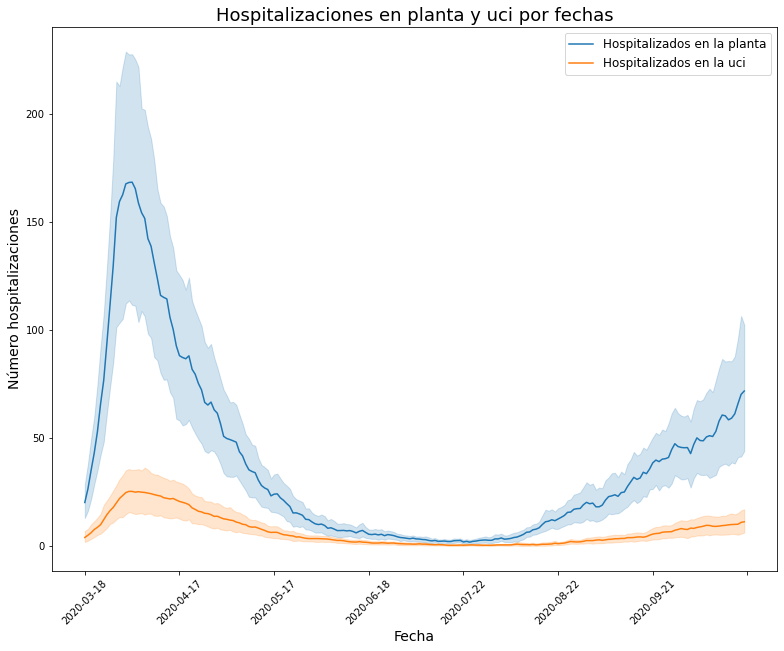

In [69]:
figure, ax1 = plt.subplots(1)
figure.set_size_inches(13,10)

sns.lineplot(ax = ax1, x = merge_prov_Nhosp.fecha,
            y = merge_prov_Nhosp.hospitalizados_planta,
            label = 'Hospitalizados en la planta')

sns.lineplot(ax = ax1, x = merge_prov_Nhosp.fecha,
            y = merge_prov_Nhosp.hospitalizados_uci,
            label = 'Hospitalizados en la uci')

plt.legend(fontsize = 12)
plt.xlabel('Fecha', size = 14)
plt.ylabel('Número hospitalizaciones', size = 14)
plt.title('Hospitalizaciones en planta y uci por fechas', size = 18)
plt.xticks((0,30,60,90,120,150,180,210), rotation = 45);